# Heatmap

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as pyplot
import numpy

In [2]:
# relative imports

import sys
sys.path.append("../commons")

from commons import build_dict, build_graph
from classes import Result

In [3]:
from datetime import datetime, timedelta

to = datetime.now()
d = timedelta(days=365*1.5)
from_ = to - d

In [4]:
import json
# import requests

f = open('data/results-africa-connectivity.json')
data = f.read()
# rs_speed = json.loads(data)
rs_speed = json.loads(data)
results = [Result.parse_speedchecker_result(r) for r in rs_speed]

In [5]:
ccs = list(set([r.country_origin for r in results] + [r.country_destination for r in results]))

In [6]:
dictionary = build_dict(results=results)

Building dict 100.00%Omitted  []


In [7]:
def chart_graph(G):
    pos=nx.drawing.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True, alpha=0.8, width=.25, node_color='#A0CBE2', format='png', prog='neato')

In [8]:
# import community
# import math
# from matplotlib import pyplot as plt
# import networkx as nx

# def analyze(G, _max=400):
#     """
#         Permform a cluster-level analysis of the different
#         dendograms the clustering algorithm returns.
#     """
#     dendogram = community.generate_dendrogram(G)
#     print "Graph 'G' information:"
#     print nx.info(G)
#     print "Dendogram information:"
#     print dendogram

In [9]:
from commons import generate_graph

G = generate_graph(rs=results)

Building dict 100.00%Omitted  []


In [10]:
from commons import clusterize

clusters = clusterize(G)

 Preparing Data (1/2) 100.0%
Painting matrix (2/2)


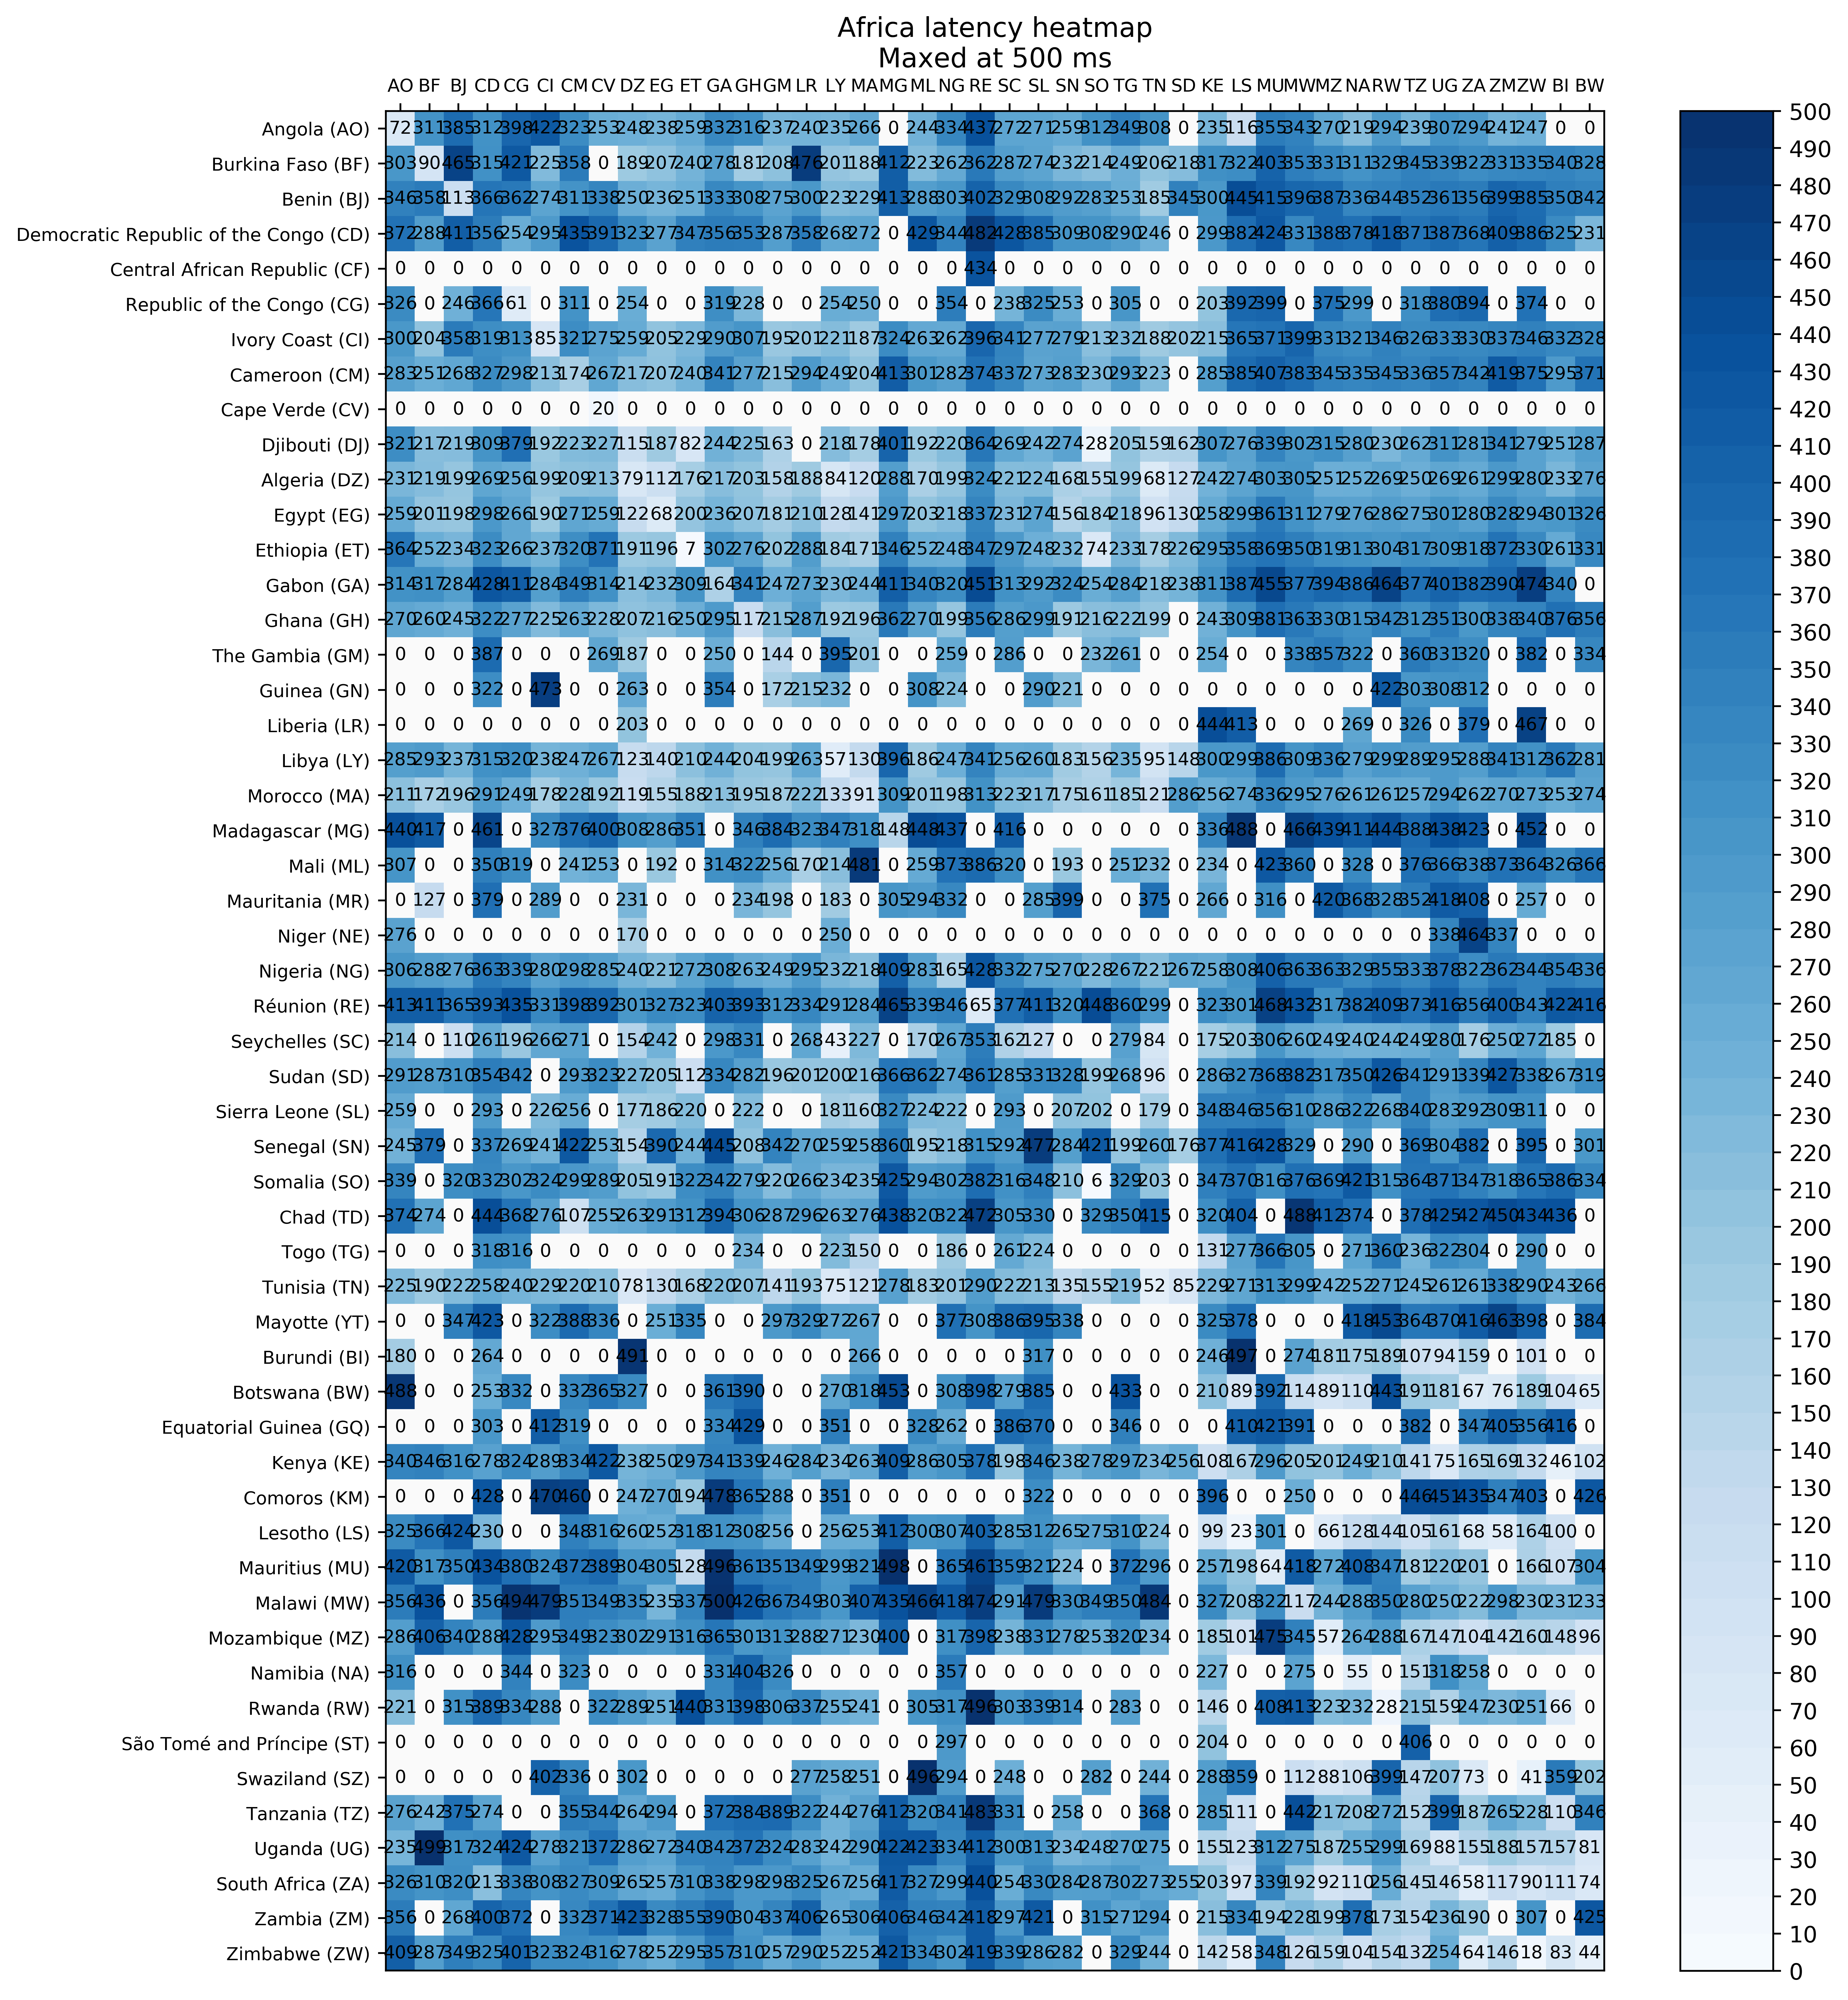

In [13]:
from commons import region_sort, build_heatmap, sort_from_dict

banned_list = ['CF', 'SO', 'SN', 'SZ', 'TD', 'ZM', 'LR', 'NE', 'YT']

build_heatmap(
    dictionary,
    filename="figs/test.png",
    plot_text=True,
    _max=500,
    sort=sort_from_dict(clusters),
    banned=[]
)

In [14]:
from commons import build_dict

dictionary = build_dict(
    results=results,
    origin_attribute='as_origin',
    destination_attribute='as_destination',
    min_squares=50
)

Building dict 100.00%Omitted  [0, 36866, 327687, 327692, 36877, 36879, 36881, 36884, 37550, 36890, 327707, 55330, 327715, 8228, 327717, 36905, 327724, 36909, 36911, 36913, 36914, 36916, 36917, 36920, 327738, 327742, 36930, 327750, 36935, 327754, 327756, 327768, 36953, 327770, 36955, 32860, 36958, 36963, 327782, 327792, 327794, 24691, 20598, 327799, 327700, 327803, 36989, 36991, 36994, 36996, 36997, 36999, 24940, 37002, 327820, 37009, 327826, 327828, 37014, 29039, 37020, 22690, 37030, 37034, 37035, 37037, 327858, 327859, 327864, 37053, 37055, 37057, 37063, 12491, 37069, 37075, 37076, 41176, 37081, 37084, 327901, 22750, 37088, 327909, 37094, 37100, 37102, 37103, 37105, 37110, 43256, 327931, 16637, 37119, 37123, 37124, 30982, 30983, 30988, 37133, 327952, 35091, 37141, 30998, 30999, 37146, 37154, 37157, 327975, 20776, 37163, 37173, 327991, 37179, 327999, 328001, 37189, 37190, 37196, 37197, 37199, 37203, 37204, 43350, 37208, 37209, 328026, 37213, 37219, 328036, 37223, 12653, 327741, 37233, 

In [15]:
G_ases = build_graph(dictionary=dictionary)

In [16]:
clusters = clusterize(G_ases)

 Preparing Data (1/2) 100.0%
Painting matrix (2/2)


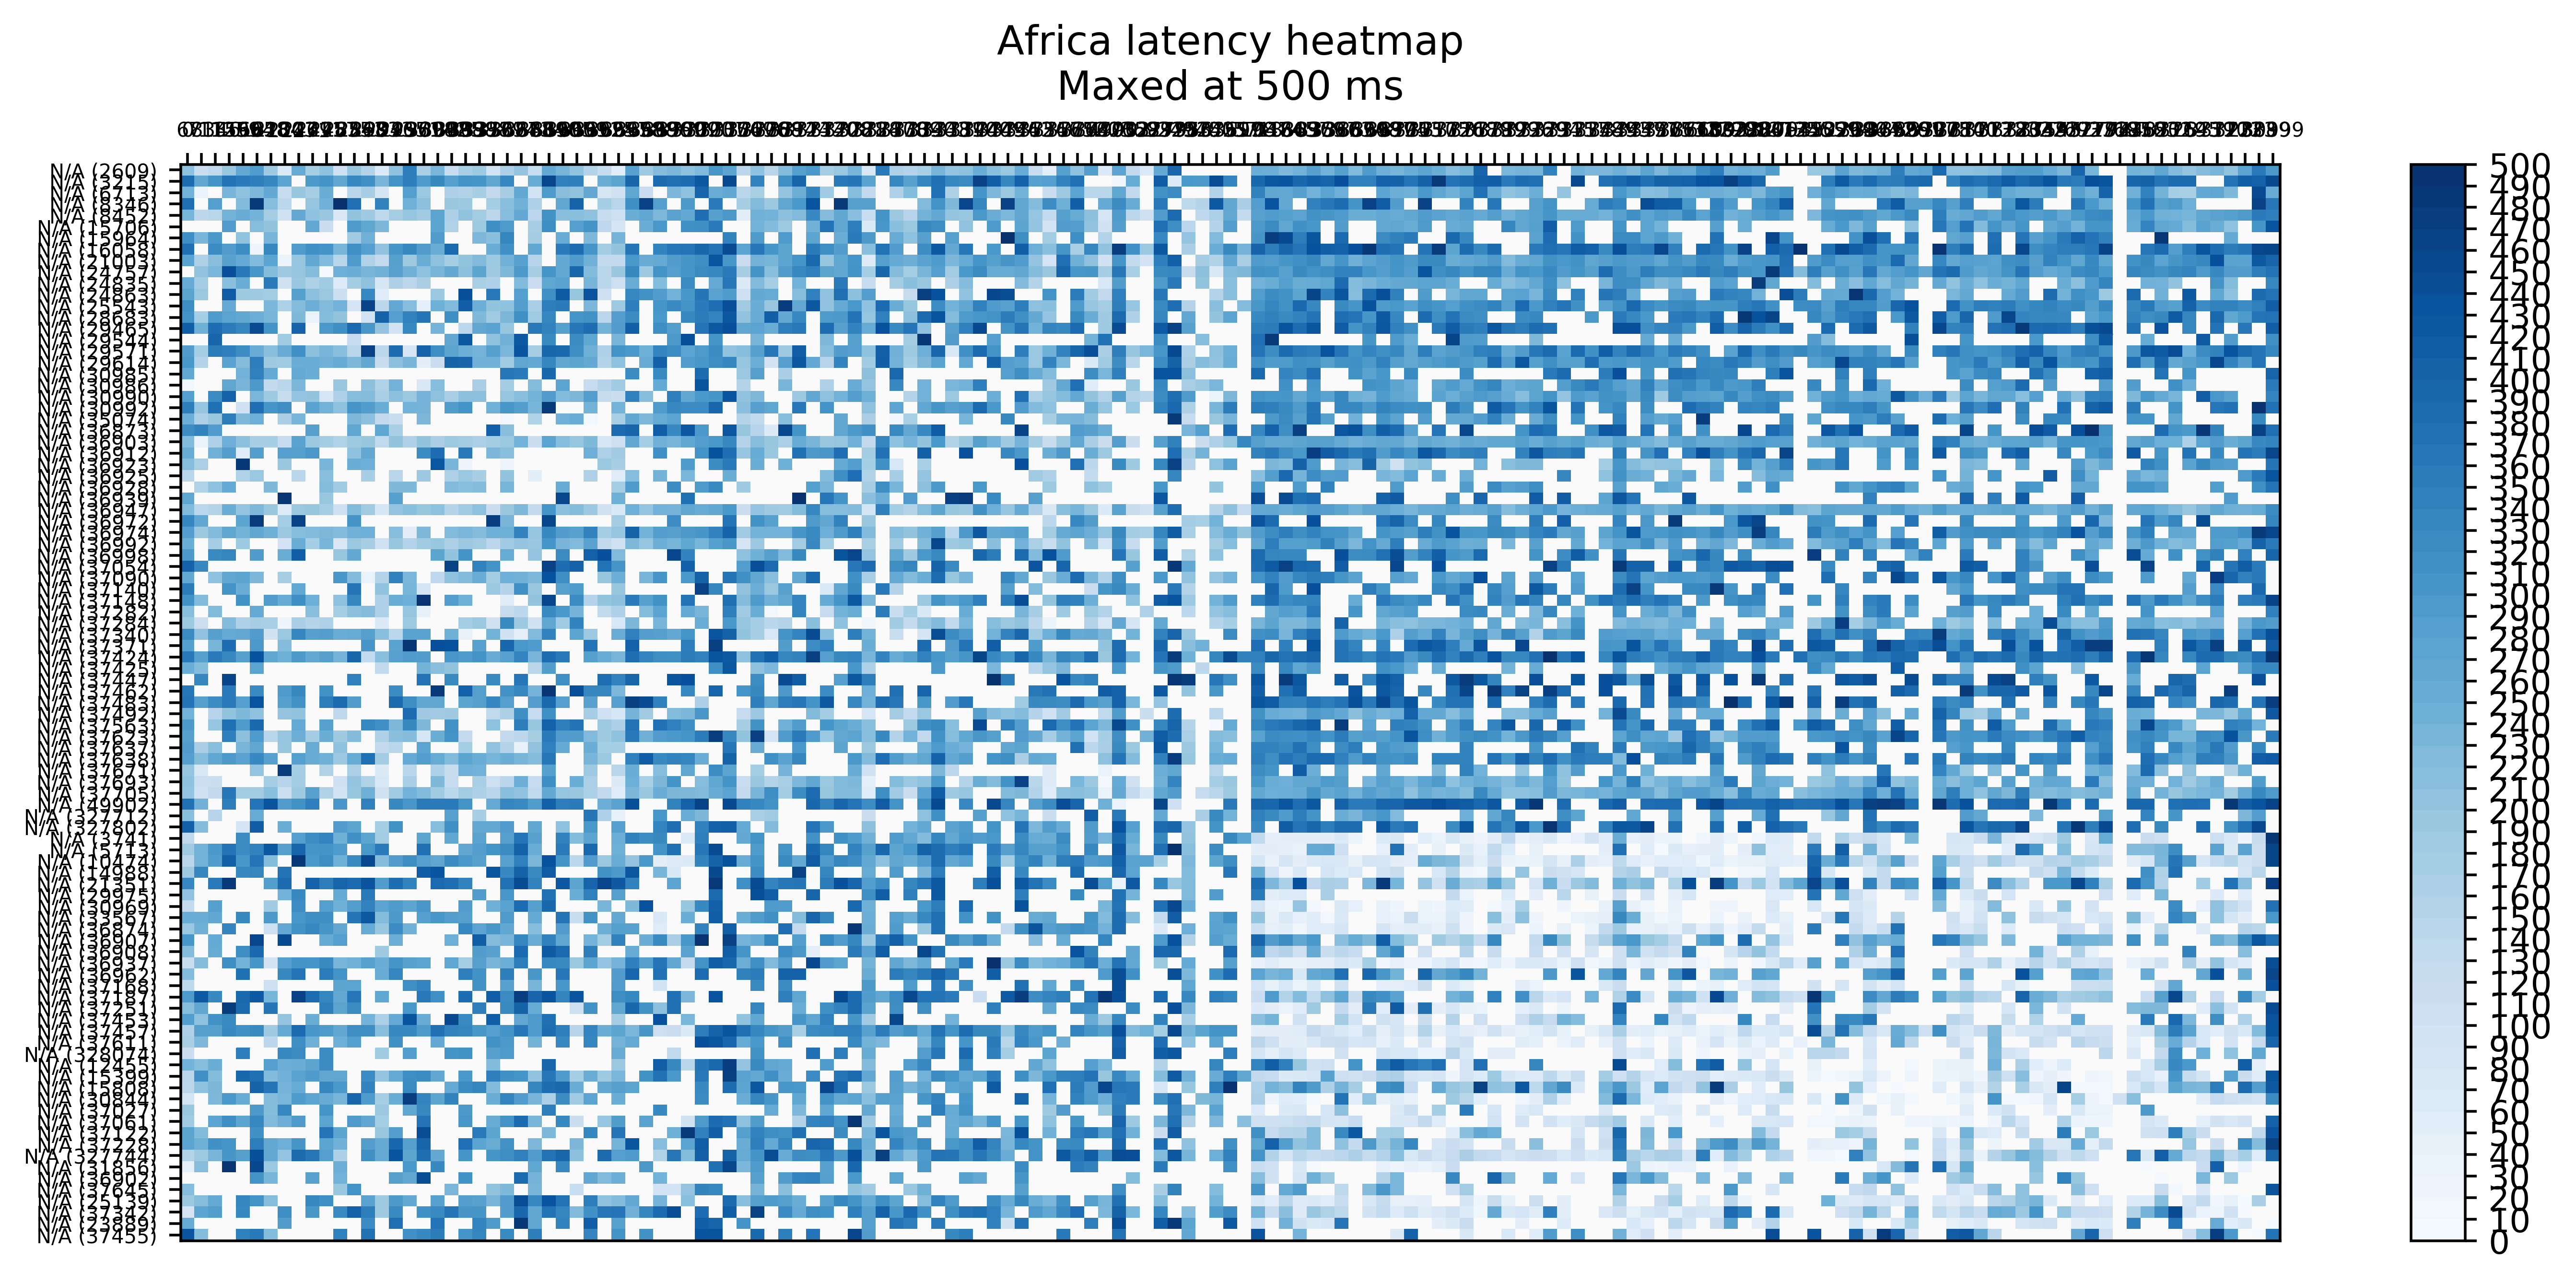

In [20]:
from commons import sort_from_dict

build_heatmap(
    dictionary,
    filename="figs/ases-matrix-cluster-sort",
    plot_text=False,
    _max=500,
    fontsize=6,
    figsize=(12,5),
    sort=sort_from_dict(clusters)
)